> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (no_show_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is about whether the patients shows up for their appointment in Brazil, the data is gathered from 100K patient. 

> The Columns are:

> 1) ScheduledDay: tells us on what day the patient set up their appointment. 

> 2) Neighborhood: indicates the location of the hospital. 

> 3) Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 

> 4) SMS Recieved: If the patients recieved a confirmation for their appointment. 

> 5) Age. 

> 6) Various illnesses.

## Question(s) for Analysis
> Thoughts:
> - The "scheduledday" can be less influental however, it could still be checked for if the patients would more likely to miss their appointments on work days/ holidays, and/or due to work hours.

> - "Neighborhood" this one can be tricky, maybe a far hospital can be quite hard to reach so it will not encourage patient to revisit unless they have something so serious, people might tend to procrastinate in this case, also if the hospital is in a crowded place that makes it usually crowded, thus increasing waiting times, this can lead to the same result.

> - "Scholarship" this can be quite straightforward as people who got the fund should be more likely to use it whenever possible.

> - "SMS Recieved" I believe that people would be more likely yo show up if they got a reminder.

> - "Age" I believe that the when you are a child your parents would care for you so you are more likely to show up for the appoitment, the older people become, the more careless and busier they will be, until they become so old that they become more interested in their health again, and their children would become old enough to help and encourage them reach the hospital.

> - "Illness" The more serious an illness is the more likely patients will show up, but this can be quite tricky as the illness itself has several phases, like diabetes.

> - As for the "Gender", it can provide some fun stats, but I am not sure they are really important here, unless they can be linked with the gender psychology and behavior, or certain illnesses that are more likely to effect specific genders, but those points are deeper and more complex compared with their usefullness.



In [1]:
## Questions:
## 1) What was the influental factors that made patients not to show up?
## 2) What is the most influental between those factors?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Absent          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (Replace this with more specific notes!)

In [7]:
## I believe they are not needed in the analysis.
df.drop(['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Absent
0,62,0,1,0,0,0,0,No
1,56,0,0,0,0,0,0,No
2,62,0,0,0,0,0,0,No
3,8,0,0,0,0,0,0,No
4,56,0,1,1,0,0,0,No


In [8]:
## no one can have -1 years old :) 
## although you can have 0 if you are few months born.
df.drop(df.index[df['Age'] == -1], inplace=True)

In [9]:
## Converting the yes,no into 1,0
dummy = pd.get_dummies(df['Absent'])
dummy.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
df = pd.concat((df, dummy), axis = 1)

In [11]:
df = df.drop(['Absent'], axis = 1)
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No,Yes
0,62,0,1,0,0,0,0,1,0
1,56,0,0,0,0,0,0,1,0
2,62,0,0,0,0,0,0,1,0
3,8,0,0,0,0,0,0,1,0
4,56,0,1,1,0,0,0,1,0


In [12]:
df = df.drop(['Yes'], axis = 1)

In [13]:
## Trying to rename the column to make more sense, although it didn`t go quite well, as will be shown down below.
df.rename(columns={'No':'Showed'})

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,62,0,1,0,0,0,0,1
1,56,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1
3,8,0,0,0,0,0,0,1
4,56,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,1
110523,51,0,0,0,0,0,1,1
110524,21,0,0,0,0,0,1,1
110525,38,0,0,0,0,0,1,1


In [14]:
## converting the object into integral to be able to use it`s numerical values for analysis, as you can see, I could only use the old name for the column not the renamed column, the reason still eludes me, my thinking right now is that this rename feature only rename the column as a copy but the core column is still got the same name, still more research is required here.
df['No'].astype(str).astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No, Length: 110526, dtype: int32

In [15]:
df.head()
## No == No show up so No = 1 -> Showed up
## No = 0 -> Absent

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No
0,62,0,1,0,0,0,0,1
1,56,0,0,0,0,0,0,1
2,62,0,0,0,0,0,0,1
3,8,0,0,0,0,0,0,1
4,56,0,1,1,0,0,0,1


In [16]:
Showed = df.No == True
Absent = df.No == False
## for Referencing

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What was the influental factors that made patients not to show up?)

0    90.173353
1     9.826647
Name: Scholarship, dtype: float64

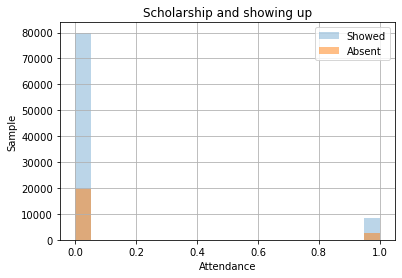

In [17]:
## I will start to check every factor and how it corrleates with patients` showing up.

df.Scholarship[Showed].hist(alpha=0.3, bins=20, label='Showed')
df.Scholarship[Absent].hist(alpha=0.5, bins=20, label='Absent')
plt.title("Scholarship and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
df['Scholarship'].value_counts(normalize=True) * 100
## It does make sense that most of who took the scholarship showed up, however most of whom didn`t take the fund also showed up, so not much corrleation here, Although this might require further investiagtion, by increasing the number of people who took the fund, and checking the percentage, which from the graph seems better than people who didn`t take the fund.


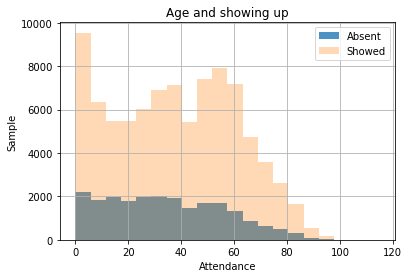

In [18]:
df.Age[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.Age[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("Age and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
## It seems that patients tend to show up at younger ages as predicted, the older they get the more likely they won`t show up until they reach a point when they become too old that their absence rate diminishes.

0    67.897146
1    32.102854
Name: SMS_received, dtype: float64

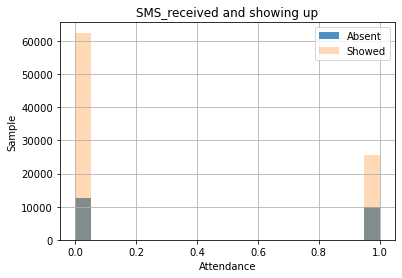

In [19]:
df.SMS_received[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.SMS_received[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("SMS_received and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
df['SMS_received'].value_counts(normalize=True) * 100
## This was quite a surprize as I initially thought that SMS would had more influence.


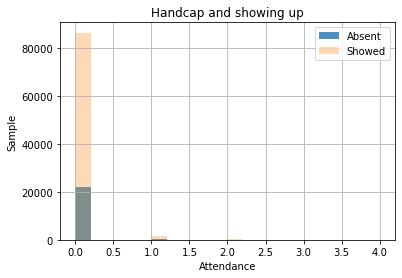

In [20]:
df.Handcap[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.Handcap[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("Handcap and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
# It seems if patients have a handicap, they are more likely to show-up.

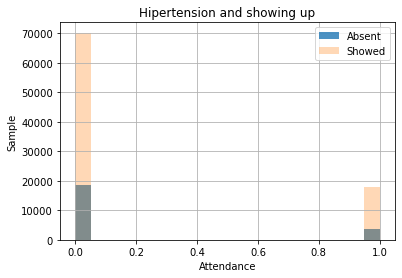

In [21]:
df.Hipertension[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.Hipertension[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("Hipertension and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
# It seems if patients have Hipertension, they are more likely to show-up.

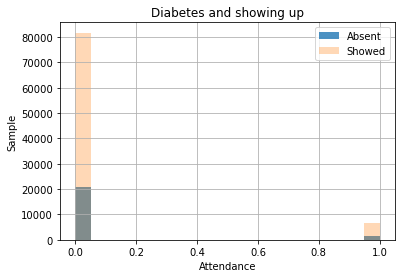

In [22]:
df.Diabetes[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.Diabetes[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("Diabetes and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
# It seems if patients have Diabetes, they are more likely to show-up.

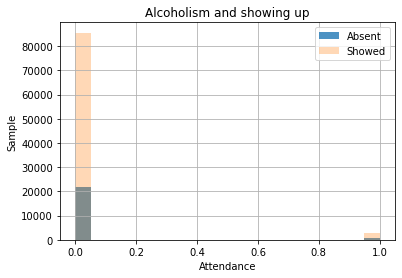

In [23]:
df.Alcoholism[Absent].hist(alpha=0.8, bins=20, label='Absent')
df.Alcoholism[Showed].hist(alpha=0.3, bins=20, label='Showed')
plt.title("Alcoholism and showing up")
plt.xlabel('Attendance') 
plt.ylabel('Sample')
plt.legend();
# It seems if patients have Alcholic, they are more likely to show-up.

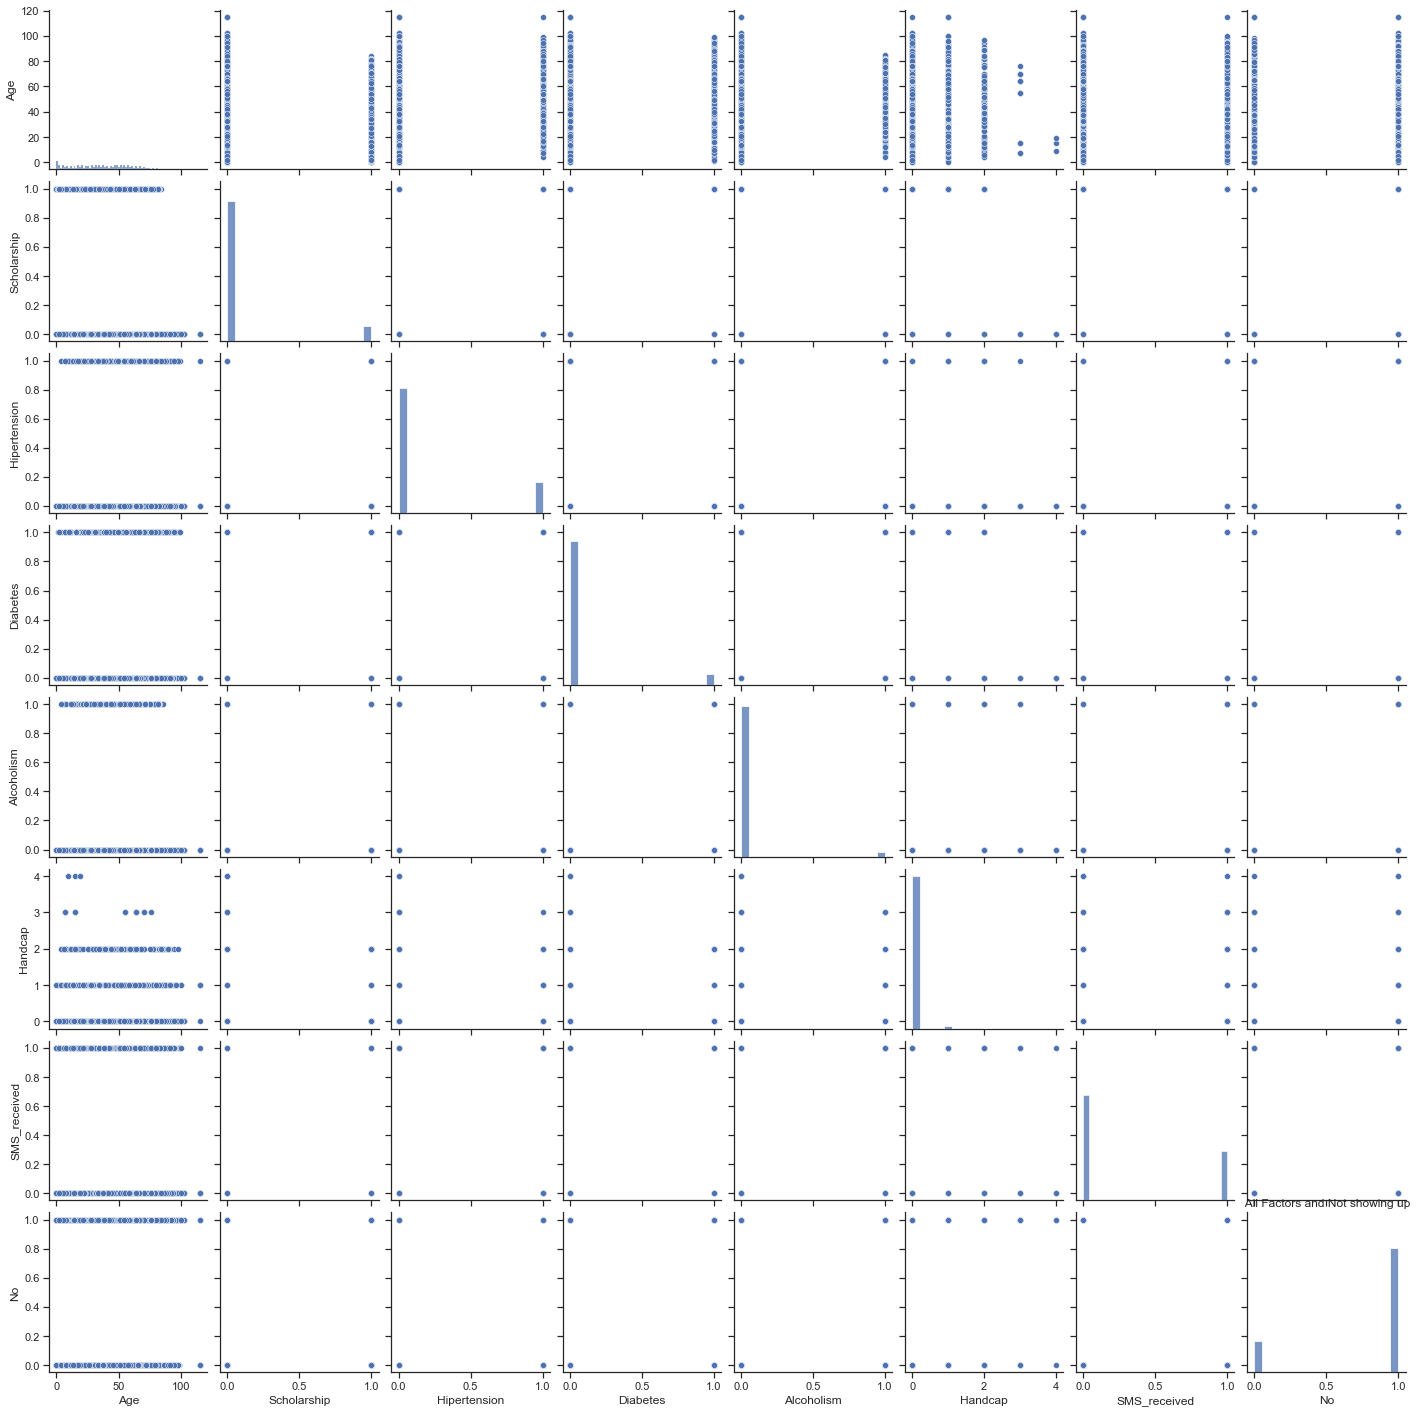

In [24]:
#I searched for a way to visualize in another method (it was not that simple to visualize binary columns, linear, scatter..etc gave no meaning when I tried to visualize the correlation between the factors), however during my pursuit, I found a real GEM!
#A code that made a plot between the different columns in one blow!
#Although I need to explore this code abit, and would probably try to use it more often to see where it goes in terms of helping me understand and analyze data, also I would want to know why it seems to favour certain plots! (I am glad it didn`t go for a line plot as I tried that and It wasn`t very pleasent :D , but I hope after some search I won`t be just glad but knowing of the exact reason, and if I can remove some of the plots like Age-Age..etc, also if I can extract a certain plots out of that plot, my initial guess is that this plot should be the first to include in the analysis, to give and overview, then use other codes to plot what seemed interesting)
#No --> Not showing so: No=1 means Absent and No = 0 means showed up for the appointment.
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df)
plt.title(" All Factors and Not showing up")
plt.show()

### Research Question 2  (What is the most influental between those factors?)

In [25]:
# It seems that having a known illness was the major influental factor, especially diabetes (but that could be due to the high number of diabetes patients, otherwise alcholic wins the race)
# Scholarship is worth investigating with more data.
#Honourable mention: Age.

<a id='conclusions'></a>
## Conclusions

Limitaions:
1) the first limitation was my lack of knowledge although I searched alot and learnd alot, I know it is not perfect, but I am happy with what I learned, got many errors, even managed to solve some without searching which was a very good motivator.

2) Neigherhood could make for a fascinating data source if the distance from the hospital were provided, same as the condition of the place of the hospital (crowded hospital, hard to reach..etc)

3) Providing meaning to the date of the appointment (Holidays/work days/hours) but I believe this can be quite complex for to little gain

4) Few data on certain factors like the Scholarship.

----
# Summary

Question 1: What was the influental factors that made patients not to show up?

A) Scholarship (need more data)

B) Age (Too young and too old tend to show more)

C) Illness (patients tends to show up more when having those illnesses)


Question 2: What is the most influental between those factors?

Scholarship, Age, Diabetes, Hipertension, and Alcholic.